## ダミーデータの作成

In [0]:
from sklearn.datasets import make_blobs

X_dataset, y_dataset = make_blobs(centers=[[-0.3, 0.5], [0.3, -0.2]],
                                  cluster_std=0.2,
                                  n_samples=100,
                                  center_box=(-1.0, 1.0),
                                  random_state=42)

## データをプロット

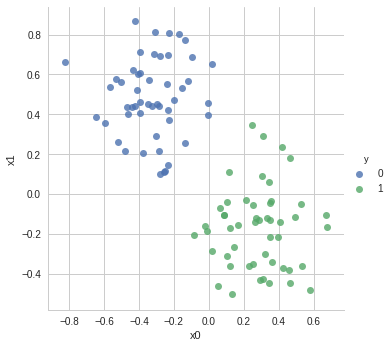

In [7]:
import pandas as pd
import seaborn as sns

# DataFrame形式に変換
dataset = pd.DataFrame(X_dataset, columns=['x0', 'x1'])
dataset['y'] = y_dataset

# プロット
sns.set_style(style='whitegrid')
sns.lmplot(x='x0', y='x1', hue='y', data=dataset, fit_reg=False)

## パーセプトロンで学習

In [8]:
from sklearn.linear_model import Perceptron

# パーセプトロン
clf = Perceptron()

# 学習
clf.fit(X_dataset, y_dataset)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

## 推論を実行

In [9]:
clf.predict([[-0.4, 0.4], [0.2, -0.2]])

array([0, 1])

## 識別境界をプロット

/usr/local/lib/python2.7/dist-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


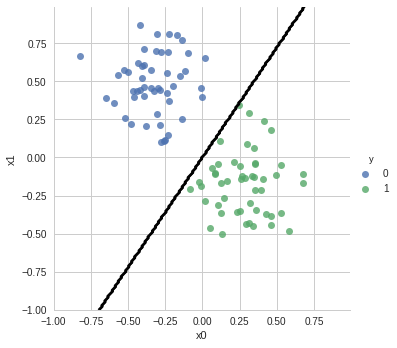

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_boundary():
  # 0.01刻みのグリッド点を生成する
  xx, yy = np.meshgrid(np.arange(-1, 1, 0.01),
                       np.arange(-1, 1, 0.01))
  # 生成したグリッド点1つ1つを推論をする
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # 描画用に2次元配列に変換
  Z = Z.reshape(xx.shape)

  # 識別境界を描画
  plt.contour(xx, yy, Z)

  # 識別境界を描画
  plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])

sns.lmplot(x='x0', y='x1', hue='y', data=dataset, fit_reg=False)
plot_boundary()

## サポートベクターマシンで学習

In [11]:
from sklearn.svm import SVC

# サポートベクターマシン
clf = SVC()

# 学習
clf.fit(X_dataset, y_dataset)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 識別境界をプロット

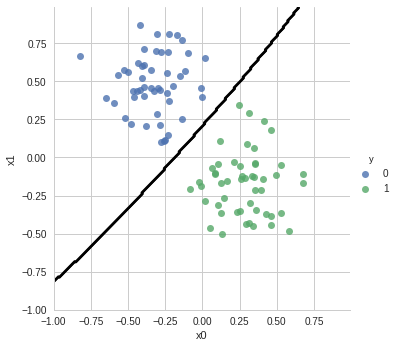

In [12]:
sns.lmplot(x='x0', y='x1', hue='y', data=dataset, fit_reg=False)
plot_boundary()

## ランダムフォレストで学習

In [13]:
from sklearn.ensemble import RandomForestClassifier

# ランダムフォレスト
clf = RandomForestClassifier(random_state=42)

# 学習
clf.fit(X_dataset, y_dataset)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

## 識別境界をプロット

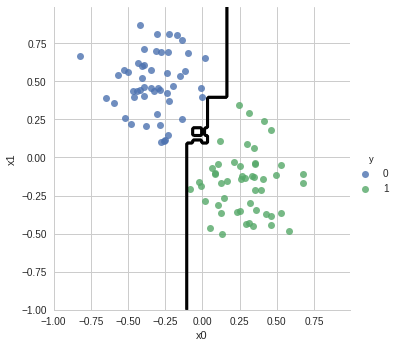

In [14]:
sns.lmplot(x='x0', y='x1', hue='y', data=dataset, fit_reg=False)
plot_boundary()

## 乳がんのデータをロード

In [0]:
from sklearn.datasets import load_breast_cancer

# 乳がんのデータをロード
X_dataset, y_dataset = load_breast_cancer(return_X_y=True)

## データを学習用とテスト用に分ける

In [0]:
from sklearn.model_selection import train_test_split

# X_datasetをX_trainとX_testに
# y_datasetをy_trainとy_testに分割
X_train, X_test, y_train, y_test = train_test_split(
    X_dataset, y_dataset, test_size=0.2, random_state=42)


## 正解率を算出

In [21]:
from sklearn.ensemble import RandomForestClassifier

# ランダムフォレスト
clf = RandomForestClassifier(random_state=42)

# 学習
clf.fit(X_train, y_train)

# テスト用データで推論し、正解率を算出
clf.score(X_test, y_test)

0.956140350877193